In [1]:
import os
import sys 
sys.path.insert(0, '/home/aiwenxu/2022-xu-retinal-degeneration')

**Part 1: running retina simulation** 

In [2]:
import numpy as np
from model.retinasim_phase12.simulation import stim_to_retina_output
from model.retinasim_phase12.simulation_utils import SimulationParam
import pickle
from brian2 import *
import os
from scipy.spatial import distance_matrix

In [3]:
pre_computed_weights_folder = "../model/weights_phase12"

for light_g_max, cone_population in [(0.9, 100), (0.75, 80), (0.6, 60), (0.45, 40), (0.3, 20)]:

    sp_txt = "../model/parameter/cottaris_original_2hz.txt"
    sp = SimulationParam(sp_txt)

    sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
    sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)
    
    # light stim
    cr_coordinates = np.load("{}/CR.npy".format(sp.xy_coord_folder))
    NUM_CR = cr_coordinates.shape[1]    
    l_b = 0.5
    cr_origin_dist_mat = distance_matrix(np.transpose(cr_coordinates), [np.array([0,0])])
    part = np.ones((NUM_CR)) * l_b
    part = np.tile(part, (3000,1))
    stim = TimedArray(part, dt=1*ms)

    time_in_ms = 3000
    select_GPU = 1
    genn_directory = "GeNNworkspace_{}".format(select_GPU)
    _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = stim_to_retina_output(time_in_ms, sp, light_g_max, pre_computed_weights_folder, lstim=stim, dt=0.1, select_GPU=select_GPU, genn_directory=genn_directory)

    data_folder = "../data/fig_spon_rate_3000/data-phase12-{}-{}".format(light_g_max, cone_population)
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_on, f)

    with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 291.2591116428375
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 264.20123171806335
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:

In [4]:
from model.retinasim_phase3.simulation import estim_to_retina_output
from model.retinasim_phase3.simulation_utils import SimulationParam
import pulse2percept as p2p

In [5]:
# in phase 3, no cone photoreceptors
# light stimulation equivalent to running the network with no stimulation

pre_computed_weights_folder = "../model/weights_phase3"
implant_mode = "epiretinal"
amp = 0

cell_percents = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
move_percents = [0, 10, 10, 20, 20, 30, 30, 40, 40, 50]

for i in range(10):
    
    cell_percent = cell_percents[i]
    move_percent = move_percents[i]
        
    sp_txt = "../model/parameter/cottaris_original_2hz.txt"
    sp = SimulationParam(sp_txt)

    sp.xy_coord_folder = "../model/layout_phase3/dendritic-tree-coordinate-{}".format(cell_percent)
    if move_percent == 0:
        sp.z_coord_folder = "../model/layout_phase3/z-coordinate-{}".format(cell_percent)
    else:
        sp.z_coord_folder = "../model/layout_phase3/z-coordinate-{}-move-{}".format(cell_percent, move_percent)
    sp.cone_exists = False
    sp.imped = 1000

    pt = p2p.stimuli.BiphasicPulseTrain(20, amp, 0.45, stim_dur=3000, cathodic_first=True)
    
    time_in_ms = 3000
    select_GPU = 1
    genn_directory = "GeNNworkspace_{}".format(select_GPU)
    _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = estim_to_retina_output(time_in_ms, sp, pt, pre_computed_weights_folder, dt=0.1, delta_ve_folder="delta_ve_workspace_{}".format(select_GPU), select_GPU=select_GPU, genn_directory=genn_directory)

    data_folder = "../data/fig_spon_rate/data-phase3-{}-{}".format(cell_percent, move_percent)
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_on, f)

    with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 155.80155086517334
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 147.09981322288513
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures

In [7]:
from model.retinasim_phase3.simulation_rgc_only import estim_to_retina_output
from model.retinasim_phase3.simulation_utils import SimulationParam

In [8]:
# running the special case where there are 0% inner neurons (only RGCs are left)

implant_mode = "epiretinal"
amp = 0
        
sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)

# This run simulates 0% cell (100% cell death), but here cell_percent=10 is used.
# This doesn't matter because the delta_ve values for the nonexistent cells will
# not be used.
cell_percent = 20
sp.xy_coord_folder = "../model/layout_phase3/dendritic-tree-coordinate-10"
sp.z_coord_folder = "../model/layout_phase3/z-coordinate-10-move-50"
sp.cone_exists = False
sp.imped = 1000

pt = p2p.stimuli.BiphasicPulseTrain(20, amp, 0.45, stim_dur=3000, cathodic_first=True)

time_in_ms = 3000
select_GPU = 1
genn_directory = "GeNNworkspace_{}".format(select_GPU)
_, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = estim_to_retina_output(time_in_ms, sp, pt, dt=0.1, delta_ve_folder="delta_ve_workspace_{}".format(select_GPU), select_GPU=select_GPU, genn_directory=genn_directory)

data_folder = "../data/fig_spon_rate/data-phase3-0-50"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
    pickle.dump(spikes_gl_on, f)

with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
    pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 60.92489719390869


**Part 2: interpolation and plotting**

In [9]:
import matplotlib.pyplot as plt
from scipy import interpolate

In [10]:
# 3000 ms data with the first 500 ms cut out
def calculate_mean_std(spikes_gl):
    rate = []
    for key in spikes_gl['t']:
        spikes = spikes_gl['t'][key]/ms
        spikes = spikes[spikes >= 500]
        rate.append(len(spikes)/2.5)
    rate_ar = np.array(rate)
    return np.mean(rate_ar), np.std(rate_ar)

In [12]:
def line_plot_disk_ring(folder):
    on_fr_mean = []
    on_fr_std = []
    off_fr_mean = []
    off_fr_std = []
    for light_g_max, cone_population in [(0.9, 100), (0.75, 80), (0.6, 60), (0.45, 40), (0.3, 20)]:
        with open("{}/data-phase12-{}-{}/spikes_gl_on.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            on_spikes = pickle.load(f)
        on_m, on_s = calculate_mean_std(on_spikes)
        on_fr_mean.append(on_m)
        on_fr_std.append(on_s)
        with open("{}/data-phase12-{}-{}/spikes_gl_off.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            off_spikes = pickle.load(f)
        off_m, off_s = calculate_mean_std(off_spikes)
        off_fr_mean.append(off_m)
        off_fr_std.append(off_s)
    cell_percents = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    move_percents = [0, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50]
    for i in range(11):
        cell_percent = cell_percents[i]
        move_percent = move_percents[i]
        with open("{}/data-phase3-{}-{}/spikes_gl_on.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            on_spikes = pickle.load(f)
        on_m, on_s = calculate_mean_std(on_spikes)
        on_fr_mean.append(on_m)
        on_fr_std.append(on_s)
        with open("{}/data-phase3-{}-{}/spikes_gl_off.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            off_spikes = pickle.load(f)
        off_m, off_s = calculate_mean_std(off_spikes)
        off_fr_mean.append(off_m)
        off_fr_std.append(off_s)
    fig, ax = plt.subplots(1,1,figsize=(18, 6))
    ax.errorbar(np.arange(16), on_fr_mean, yerr=on_fr_std, label="ON RGCs", linewidth=3)
    ax.errorbar(np.arange(16), off_fr_mean, yerr=off_fr_std, label="OFF RGCs", linewidth=3)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    ax.set_xticklabels(["healthy", "$g_\max$=0.75\ncone 80%", "$g_\max$=0.6\ncone 60%", "$g_\max$=0.45\ncone 40%", "$g_\max$=0.3\ncone 20%", "cone 0%", "death 10%\nmigration 10%", "death 20%\nmigration 10%", "death 30%\nmigration 20%", "death 40%\nmigration 20%", "death 50%\nmigration 30%", "death 60%\nmigration 30%", "death 70%\nmigration 40%", "death 80%\nmigration 40%", "death 90%\nmigration 50%", "death 100%\nmigration 50%"], fontsize=7)
    ax.set_ylabel("Firing Rate (Hz)")
    ax.legend()
    plt.savefig("spon_rate_3000.pdf")

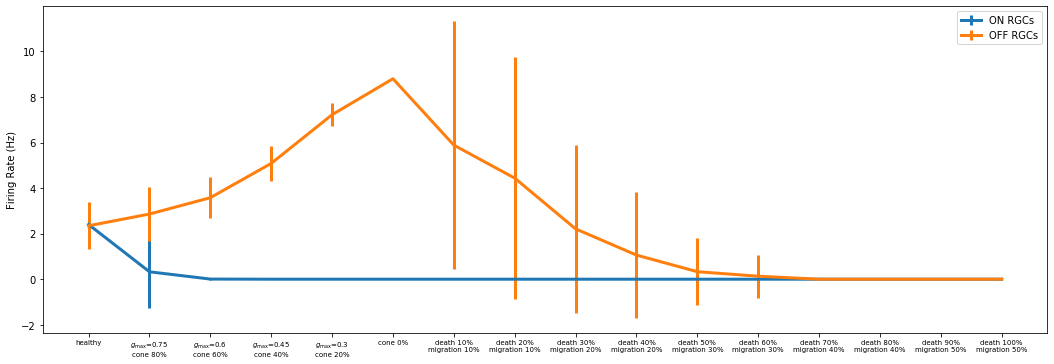

In [14]:
line_plot_disk_ring("../data/fig_spon_rate_3000")